In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L=[]
for i in range(10000):
    a=random.randint(1,6)
    # b=random.randint(1,6)
    L.append(a)

In [4]:
L[:5]

[1, 3, 3, 4, 1]

In [5]:
s=(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
print(s)

1    0.1689
2    0.1659
3    0.1651
4    0.1680
5    0.1640
6    0.1681
Name: count, dtype: float64


<Axes: title={'center': 'PMF'}>

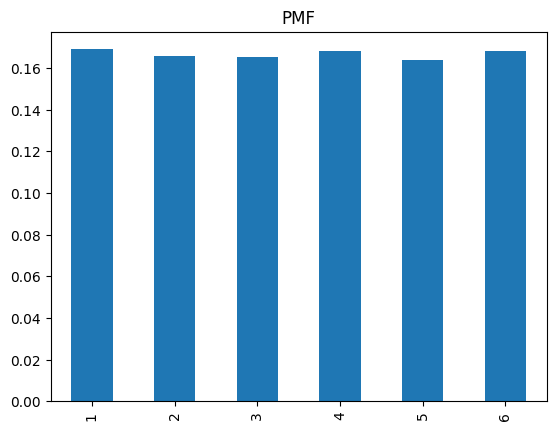

In [6]:
s.plot(kind="bar",title="PMF")

In [7]:
L1=[]
for i in range(10000):
    a=random.randint(1,6)
    b=random.randint(1,6)
    L1.append(a+b)

In [8]:
L1[:5]

[9, 8, 6, 7, 8]

In [9]:
s1=(pd.Series(L1).value_counts()/pd.Series(L1).value_counts().sum()).sort_index()
print(s1)

2     0.0286
3     0.0551
4     0.0849
5     0.1123
6     0.1429
7     0.1690
8     0.1373
9     0.1083
10    0.0808
11    0.0531
12    0.0277
Name: count, dtype: float64


<Axes: title={'center': 'PMF'}>

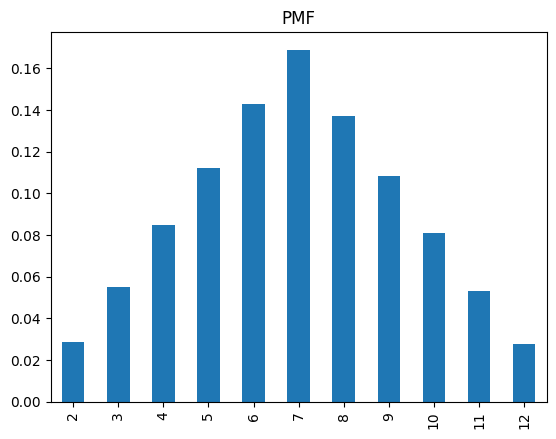

In [10]:
s1.plot(kind="bar",title="PMF")

In [11]:
import numpy as np

<Axes: title={'center': 'Cummulative PMF'}>

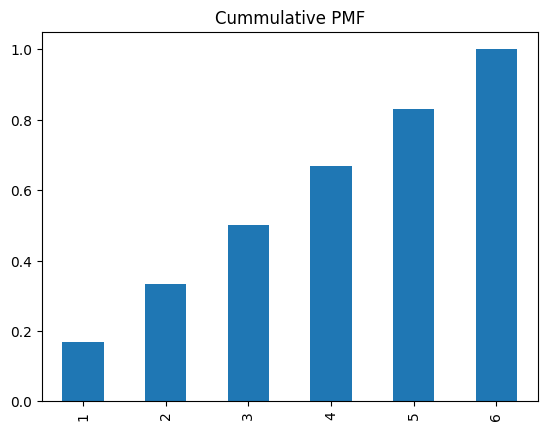

In [12]:
np.cumsum(s)
np.cumsum(s).plot(kind="bar",title="Cummulative PMF")

<Axes: title={'center': 'Cummulative PMF'}>

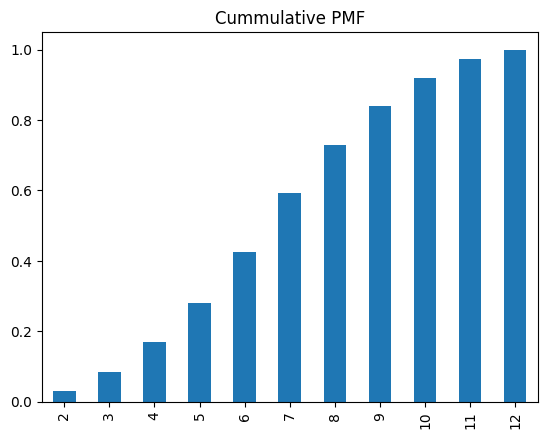

In [13]:
np.cumsum(s1)
np.cumsum(s1).plot(kind="bar",title="Cummulative PMF")

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [15]:
L2=np.random.randint(0,100,10000)

In [16]:
m=np.mean(L2)
sd=np.std(L2)
a=math.sqrt(2)


In [17]:
CDF = []
for i in range(10000):
    err_f = math.erf((L2[i] - m) / (sd * a))
    cdf = 0.5 * (1 + err_f)
    CDF.append(cdf)

(array([0.01351515, 0.00957576, 0.00875758, 0.01236364, 0.00933333,
        0.00878788, 0.01293939, 0.00884848, 0.00939394, 0.00954545,
        0.012     , 0.00830303, 0.00912121, 0.01184848, 0.00845455,
        0.00942424, 0.01293939, 0.00860606, 0.00921212, 0.00848485,
        0.012     , 0.0089697 , 0.00933333, 0.01109091, 0.00924242,
        0.00884848, 0.01263636, 0.00909091, 0.00815152, 0.01221212]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ,
        36.3, 39.6, 42.9, 46.2, 49.5, 52.8, 56.1, 59.4, 62.7, 66. , 69.3,
        72.6, 75.9, 79.2, 82.5, 85.8, 89.1, 92.4, 95.7, 99. ]),
 <BarContainer object of 30 artists>)

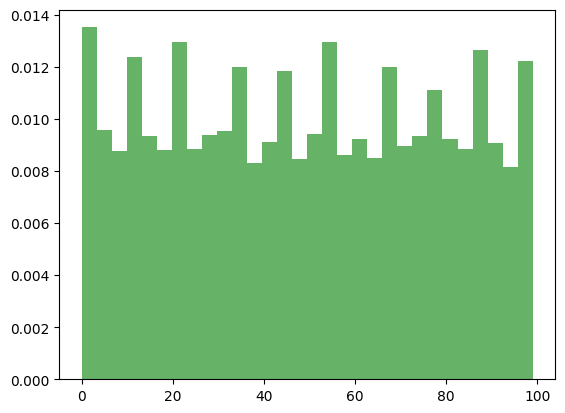

In [18]:
plt.hist(L2, bins=30, density=True, alpha=0.6, color='g', label='Histogram')

TypeError: _parse_args() takes from 1 to 3 positional arguments but 4 were given

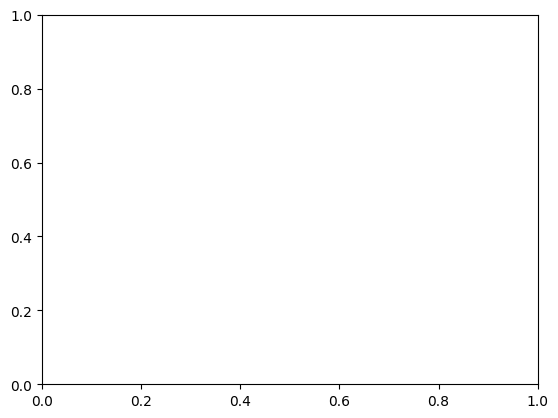

In [19]:
xmin,xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
p=norm(x,m,sd)
plt.plot(x,p,'k',linewidth=2,label="Normal Distribution")

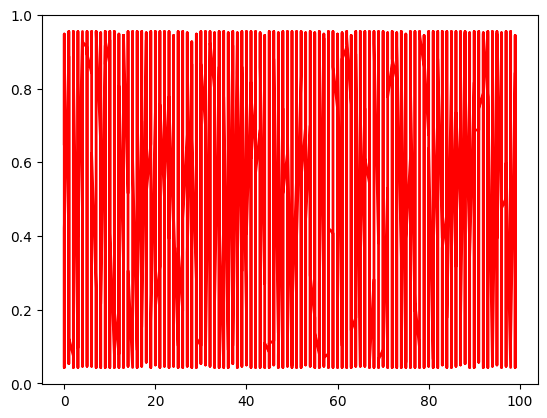

In [ ]:
plt.plot(sorted(L2), CDF, 'r-', linewidth=2, label='CDF')

In [22]:
from numpy.random import normal

Parametric Density Estimation


In [23]:
sample=normal(loc=50,scale=5,size=1000)

In [24]:
sample.mean()
print(sample.std())

5.0482691720361865


(array([  5.,  20.,  79., 165., 215., 269., 152.,  68.,  22.,   5.]),
 array([33.73016128, 36.99393107, 40.25770087, 43.52147066, 46.78524046,
        50.04901025, 53.31278005, 56.57654984, 59.84031964, 63.10408944,
        66.36785923]),
 <BarContainer object of 10 artists>)

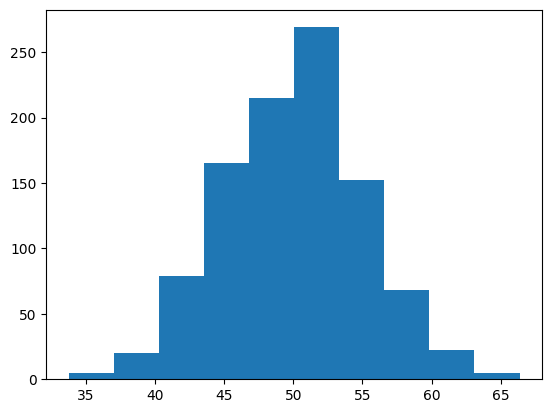

In [25]:
plt.hist(sample,bins=10)

In [26]:
sample_mean=sample.mean()
sample_std=sample.std()

In [40]:
dist=norm(sample_mean,sample_std)

In [41]:
values=np.linspace(sample.min(),sample.max(),100)

In [29]:
sample.max()

66.36785923175464

In [42]:
probabilities=[dist.pdf(value) for value in values]

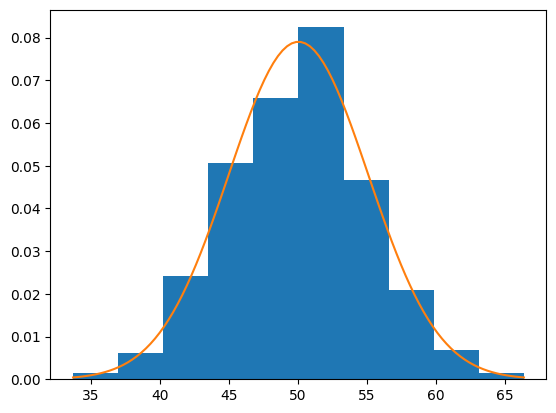

In [43]:
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\vrajd\AppData\Local\Temp\ipykernel_7548\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

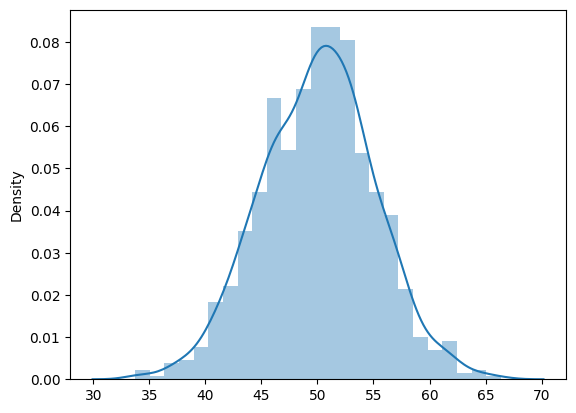

In [32]:
import seaborn as sns
sns.distplot(sample)

In [33]:
sample2=normal(loc=100,scale=50,size=100)

In [34]:
sample2.mean()

97.82647609976891

In [35]:
sample2.std()

49.28311760086733

(array([ 6.,  7., 11., 15., 22., 14., 11., 10.,  2.,  2.]),
 array([ -6.94369782,  16.27857517,  39.50084817,  62.72312117,
         85.94539416, 109.16766716, 132.38994016, 155.61221315,
        178.83448615, 202.05675914, 225.27903214]),
 <BarContainer object of 10 artists>)

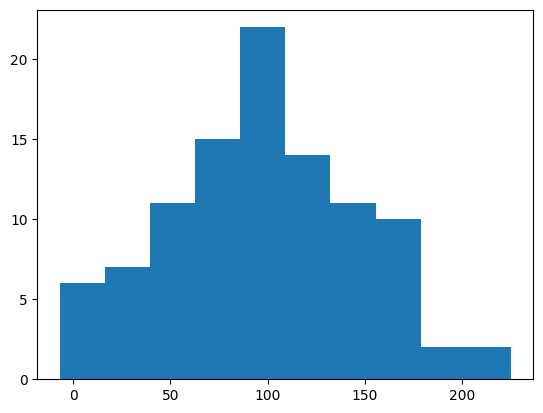

In [37]:
plt.hist(sample2)

In [38]:
sample2_mean=sample2.mean()
sample2_std=sample2.std()

In [44]:
dist2=norm(sample2_mean,sample2_std)

In [53]:
values2=np.linspace(sample2.min(),sample2.max(),10)
print(values2)

[ -6.94369782  18.85882773  44.66135328  70.46387883  96.26640438
 122.06892993 147.87145549 173.67398104 199.47650659 225.27903214]


In [55]:
probabilities2=[dist2.pdf(value) for value in values2]
sum=0


0.038374245518784135


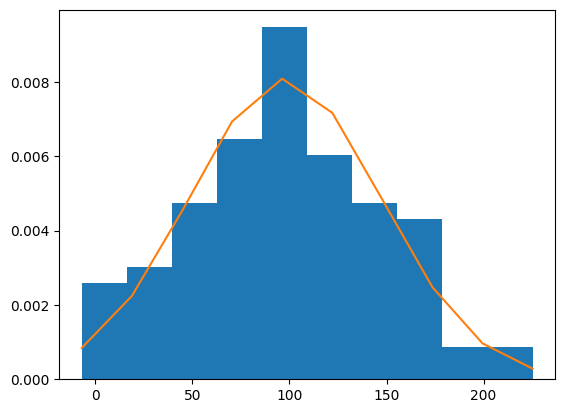

In [52]:
plt.hist(sample2,density=True)
plt.plot(values2,probabilities2)

C:\Users\vrajd\AppData\Local\Temp\ipykernel_7548\3394060466.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample2)


<Axes: ylabel='Density'>

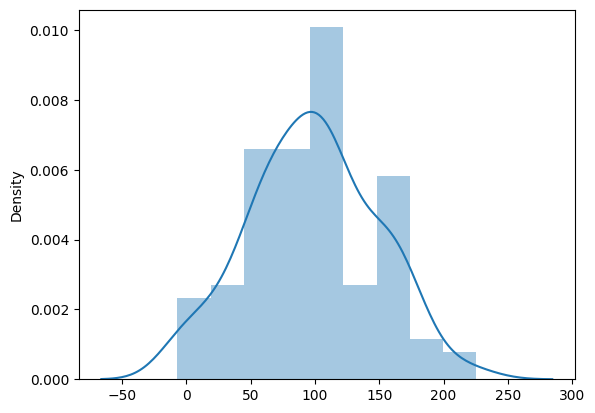

In [48]:
sns.distplot(sample2)

Kernel Density Estimation

(array([ 1.,  1.,  1.,  0.,  1.,  3.,  3.,  2.,  6.,  2.,  6.,  4.,  3.,
         5., 10.,  7., 16., 13., 10., 12.,  9.,  9., 12., 13., 11., 13.,
        14., 14., 11.,  8., 15.,  7., 10.,  7.,  5.,  4.,  4.,  6.,  2.,
         5.,  2.,  2.,  5.,  6.,  6.,  4.,  4.,  5.,  3., 10., 14.,  7.,
         9.,  9., 11., 13., 15., 21., 18., 15., 23., 28., 36., 16., 25.,
        21., 33., 30., 23., 17., 23., 25., 24., 21., 27., 24., 19., 10.,
         8., 12., 12., 13., 13.,  5.,  7.,  6.,  6.,  6.,  4.,  2.,  1.,
         5.,  2.,  1.,  2.,  2.,  1.,  1.,  0.,  2.]),
 array([ 8.7967774 ,  9.26257037,  9.72836333, 10.19415629, 10.65994925,
        11.12574221, 11.59153517, 12.05732814, 12.5231211 , 12.98891406,
        13.45470702, 13.92049998, 14.38629294, 14.85208591, 15.31787887,
        15.78367183, 16.24946479, 16.71525775, 17.18105071, 17.64684368,
        18.11263664, 18.5784296 , 19.04422256, 19.51001552, 19.97580848,
        20.44160144, 20.90739441, 21.37318737, 21.83898033, 22.304773

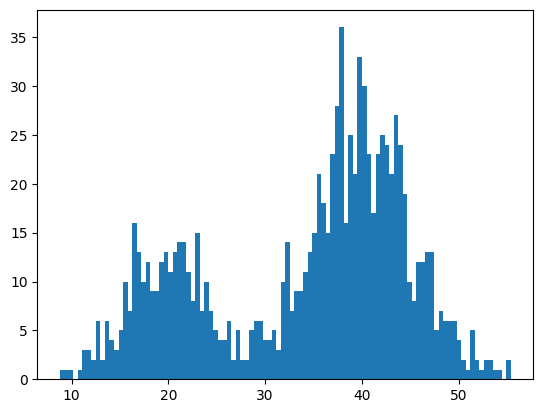

In [61]:
sample_1=normal(loc=20,scale=5,size=300)
sample_2=normal(loc=40,scale=5,size=700)

sample_kde=np.hstack((sample_1,sample_2))

plt.hist(sample_kde,bins=100)

In [57]:
from sklearn.neighbors import KernelDensity

model=KernelDensity(bandwidth=3,kernel="gaussian")

In [62]:
sample_kde=sample_kde.reshape((len(sample_kde),1))

In [63]:
model.fit(sample_kde)

KernelDensity(bandwidth=3)

In [65]:
values=np.linspace(sample_kde.min(),sample_kde.max(),100)
values=values.reshape((len(values),1))

In [66]:
probabilities=model.score_samples(values)
probabilities=np.exp(probabilities)

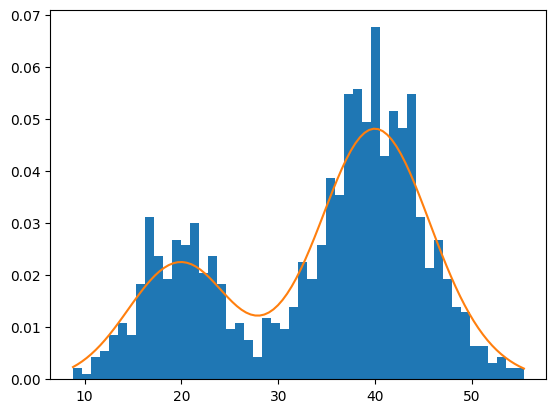

In [67]:
plt.hist(sample_kde,bins=50,density=True)
plt.plot(values[:],probabilities)
plt.show()

<Axes: ylabel='Density'>

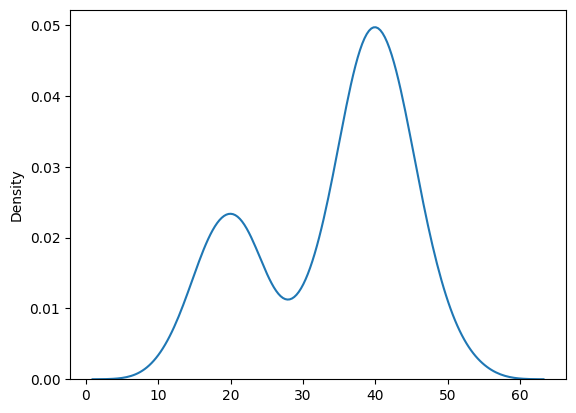

In [70]:
sns.kdeplot(sample_kde.reshape(1000),bw_adjust=1)
# more bandwidths more  spikes as spread area reduces

2D Probability Density plots

In [71]:
df=sns.load_dataset('iris')

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


<Axes: xlabel='sepal_length', ylabel='Density'>

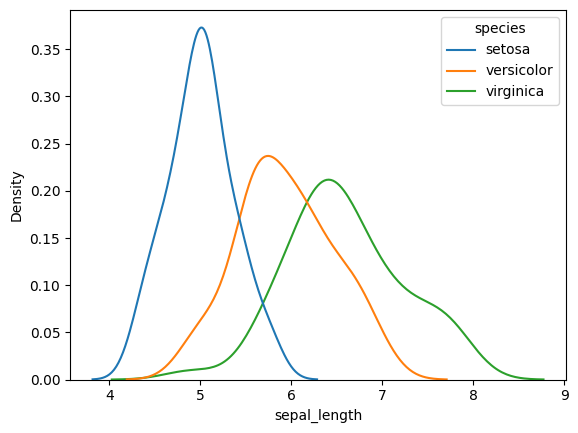

In [79]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

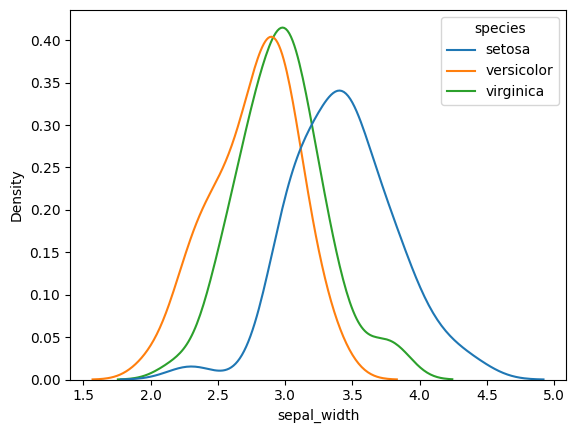

In [80]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

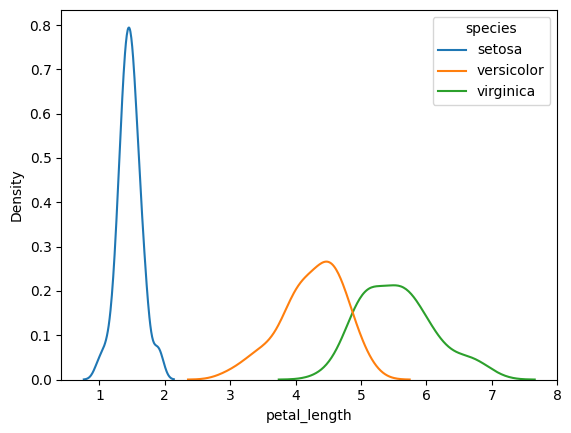

In [81]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

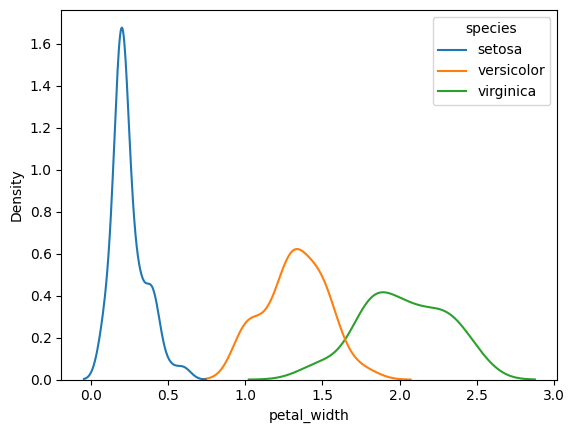

In [82]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

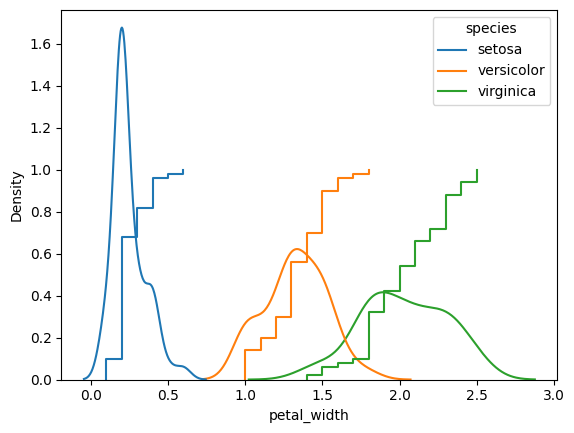

In [83]:
sns.kdeplot(data=df,x='petal_width',hue='species')
sns.ecdfplot(data=df,x="petal_width",hue='species')

In [84]:
titanic=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

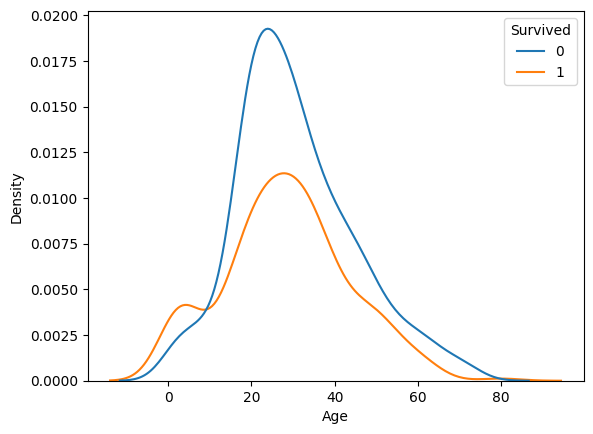

In [93]:
sns.kdeplot(data=titanic,x='Age',hue='Survived')